In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\dlsat\Downloads\archive (9)\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
data.iloc[:,[3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
x = data.iloc[:,[3,4]].values

Text(0, 0.5, 'WCSS')

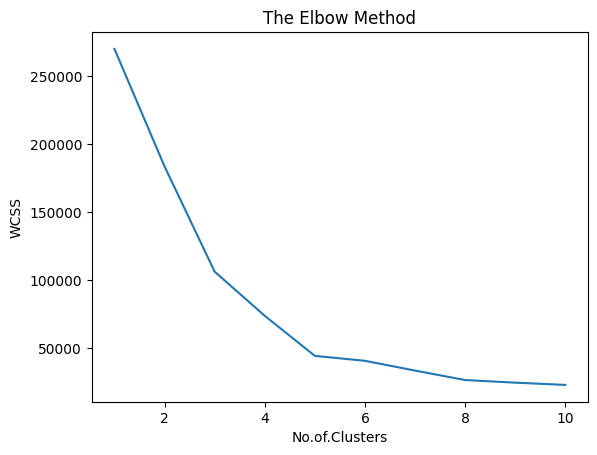

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = "k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No.of.Clusters")
plt.ylabel("WCSS")

In [17]:
kmeans = KMeans(n_clusters=5,init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

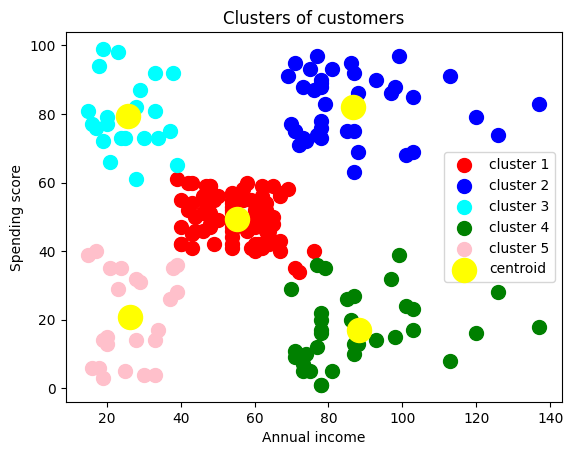

In [42]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s =100, c = 'red',label="cluster 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s =100, c = 'blue',label="cluster 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s =100, c = 'cyan',label="cluster 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1], s =100, c = 'green',label="cluster 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1], s =100, c = 'pink',label="cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c = "yellow",label="centroid")
plt.legend()
plt.title("Clusters of customers")
plt.ylabel("Spending score")
plt.xlabel("Annual income")
plt.show()